# 0. Introdução

A análise abaixo foi feita utilizando dados do RH da IBM que foram disponibilizados no site www.kaggle.com.

Nossa motivação é entender o perfil das pessoas que deixam a empresa. Isso pode ser importante para prevenir demissões, diminuir custos operacionais e melhorar a satisfação dos empregados, o que, consequentemente, deve aumentar a produtividade da empresa.

Perguntas que tentaremos responder com essa análise:
- Existe uma disparidade salarial entre homens e mulheres?
- Há alguma evidência de que gênero tenha impacto no atrito entre funcionário e empresa? Aqui atrito se refere aos funcionários que deixam a empresa.
- Qual a relação entre salário e departamento em que funcionário atua?
.<br>
.<br>
.<br>
- ...

Fonte do dataset: 

<b><i>Nota: Forma de pensar na análise -> Analisar o dataset (estrutura) -> Análise univariada -> Análise Bivariada -> Análise Multivariada -> Machine Learning(ML)</b></i>


# 1. Carregando bibliotecas

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("ggplot")

# 2. Carregando dataset

In [2]:
rh = pd.read_csv("data\WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [3]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
rh.shape

(1470, 35)

In [6]:
rh.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# 3. Análise univariada

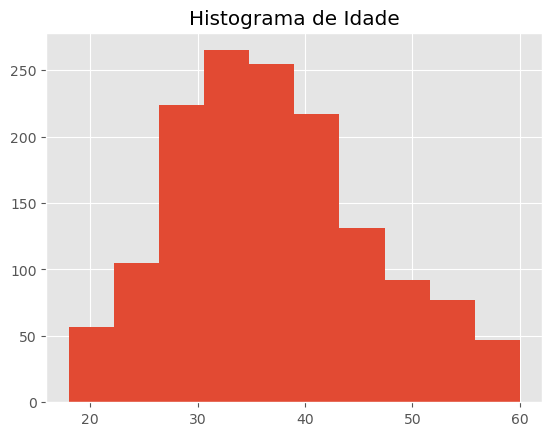

In [7]:
_ = plt.hist(rh.Age)
_ = plt.title("Histograma de Idade")

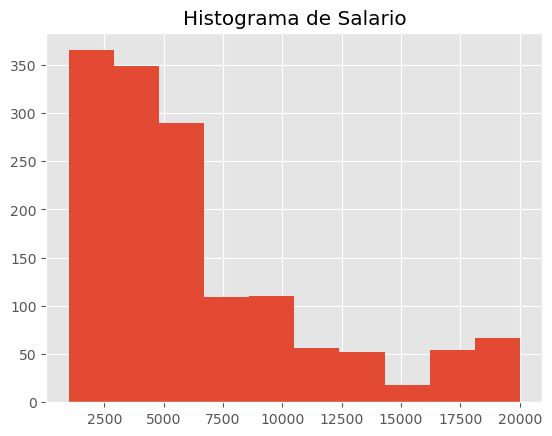

In [8]:
_ = plt.hist(rh.MonthlyIncome)
_ = plt.title("Histograma de Salario")

In [9]:
rh.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

Por ser uma empresa que contrata muitas pessoas da área de STEM é esperado que tenha mais funcionários homens.

In [10]:
rh.Gender.value_counts(1)

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

In [11]:
rh.EducationField.value_counts(1)

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

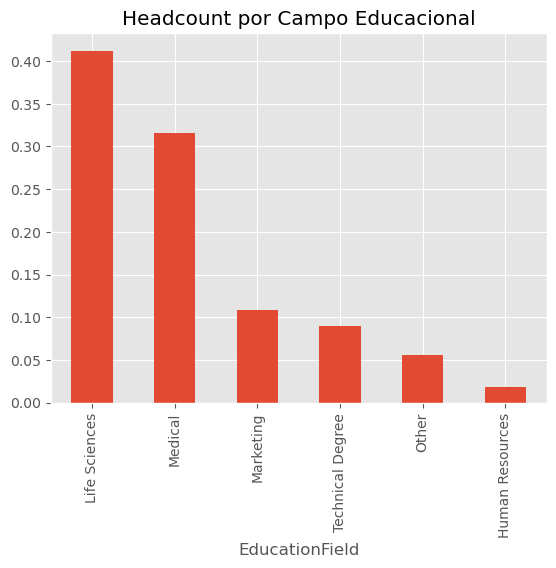

In [12]:
_ = rh.EducationField.value_counts(1).plot.bar()
_ = plt.title("Headcount por Campo Educacional")

Vemos que a maioria dos funcionarios é formado na área de life science. Na sequencia, temos muitos funcionarios da área Medical. A área com menos funcionários formados é a Human Resources.

# 4. Análise Bivariada

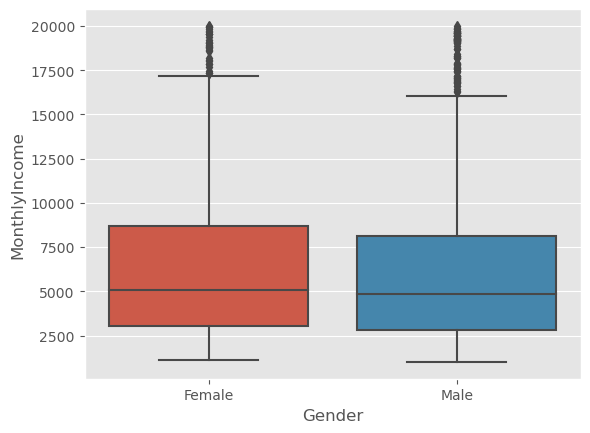

In [13]:
_ = sns.boxplot(x="Gender", y="MonthlyIncome", data=rh)

Curiosamente a destribuição salarial entre homens e mulheres é bem parecida. Normalmente, espera-se encontrar salários mais altos para homens, porém, no caso da IBM, o gender gap paraece não ocorrer.

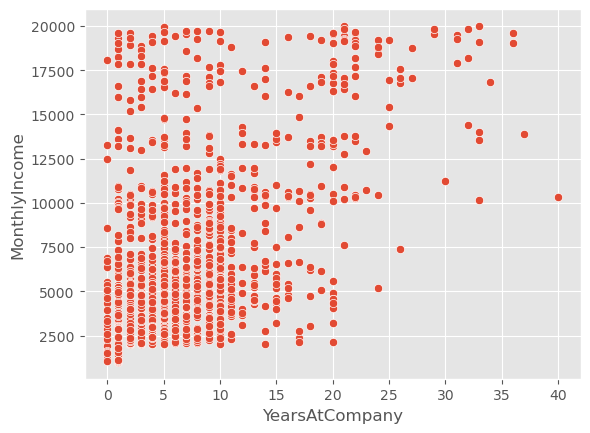

In [14]:
_ = sns.scatterplot(x="YearsAtCompany", y="MonthlyIncome", data=rh)

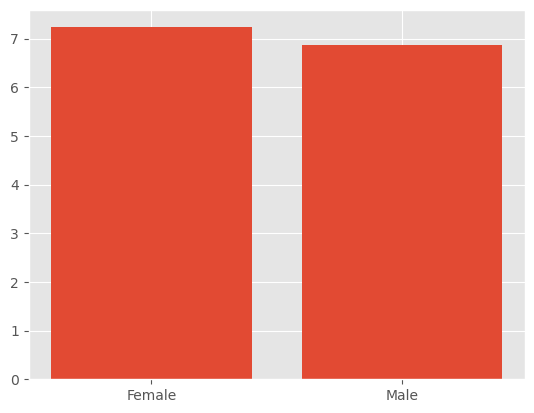

In [24]:
_ = plt.bar(x=rh.groupby("Gender")["YearsAtCompany"].mean().index, 
                         height=rh.groupby("Gender")["YearsAtCompany"].mean())

É possível notar que não há uma diferença no tempo na empresa de funcionários de gêneros diferentes, ou seja, o gênero não impacta no atrito entre funcionário e empresa no IBM.

In [39]:
rh["Department"].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

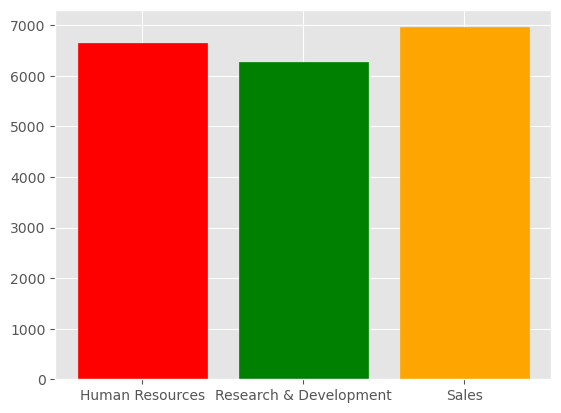

In [37]:
media_salarial_dep = rh.groupby("Department")["MonthlyIncome"].mean()
graf_bar = plt.bar(media_salarial_dep.index, media_salarial_dep)

graf_bar[0].set_color("red")
graf_bar[1].set_color("green")
graf_bar[2].set_color("orange")

É possível notar, por meio da média dos salários por departamento, que "Sales" tem em média salarial maior, na sequência vem "Human Resources" e por fim "Research e Development".